Consider different random orthogonal matrices. Fix eigenvalue (eg assuming two to be the same) and consider the error in the approximation of dR by dC and dE.

See details on random orthogonal matrices from Nick Higham https://nhigham.com/2020/04/22/what-is-a-random-orthogonal-matrix/

In [1]:
from time import time
import numpy as np
import os
import sys
from matplotlib import pyplot as plt
from scipy.stats import ortho_group
# include the src path
sys.path.insert(0, "src")
from EigenValueDecomposition import *
from MinMaxthetafromQRQI import *
from SortEigenValues import *
from AnglesSortedQRQI import *
from SplitTensor import *
from Fmeasure import *
from Commeasure import *

In [2]:
# Fix number of cases to be considered and fix some eigenvalues.
N=100
uR=np.diag([1,1,2])
uI=np.diag([2,2,3])
N0=np.zeros((3,3))
Rstore=np.zeros((N,9))
Istore=np.zeros((N,9))
Mlist=np.zeros(9, dtype=complex)
TensorArray=np.zeros((N,9),dtype=complex)
Frequencies=np.zeros(N)

In [3]:
for n in range(N):
    # Generate a random orthogonal matrix for R and I
    orthogonalmatrixR = ortho_group.rvs(dim=3)
    while np.linalg.det(orthogonalmatrixR)<0:
        # The generated orthogonal matrix is not garanteed to have det +1!
        # Keep calling to make sure we get one with this property.
        orthogonalmatrixR = ortho_group.rvs(dim=3)
    #Rot=np.zeros((3,3))
    #theta=0.1
    #Rot[0,0] =1
    #Rot[1,1] =np.cos(theta)
    #Rot[1,2] = -np.sin(theta)
    #Rot[2,1] = np.sin(theta)
    #Rot[2,2] = np.cos(theta)
    orthogonalmatrixI=orthogonalmatrixR
# Generate a random orthogonal matrix for R and I
    #orthogonalmatrixI = ortho_group.rvs(dim=3)
    #while np.linalg.det(orthogonalmatrixI)<0:
    #    # The generated orthogonal matrix is not garanteed to have det +1!
    #    # Keep calling to make sure we get one with this property.
    #    orthogonalmatrixI = ortho_group.rvs(dim=3)

    # Obtain the corresponding R and I
    R=np.transpose(orthogonalmatrixR)@uR@orthogonalmatrixR
    I=np.transpose(orthogonalmatrixI)@uI@orthogonalmatrixI
    Rtilde=R+N0
    M=Rtilde+1j*I
    Mlist[0]=M[0,0]
    Mlist[1]=M[0,1]
    Mlist[2]=M[0,2]
    Mlist[3]=M[1,0]
    Mlist[4]=M[1,1]
    Mlist[5]=M[1,2]
    Mlist[6]=M[2,0]
    Mlist[7]=M[2,1]
    Mlist[8]=M[2,2]
    for i in range(9):
        TensorArray[n,i]=Mlist[i]

        
Rstore,Istore,Rtildestore = SplitTensor(TensorArray,Frequencies,N0)

# Determine eigenvalue decompositions of N0, R, I, Rtilde (no sorting applied), and their multiplicities
MultRstore, MultIstore, MultRtildestore, URstore, UIstore, URtildestore, QRstore, QIstore, QRtildestore = EigenValueDecomposition(N0,TensorArray,Frequencies)

# Determine the maximal and minimal angles from QR and QI also output d_F metric for these orderings
MinAnglestoreRI, MaxAnglestoreRI, dFMinAnglestoreRI, dFMaxAnglestoreRI = MinMaxthetafromQRQI(Frequencies,QRstore,QIstore,URstore, UIstore,MultRstore,MultIstore)

# Sort eigenvalues (and eigenvectors) so that || Lambda_R - Lambda_I || is maximal
sorteigenvalues="MaxDifference"

#SortedMultRstore, SortedMultIstore, SortedMultRtildestore, SortedURstore, SortedUIstore, SortedURtildestore, SortedQRstore, SortedQIstore, SortedQRtildestore = SortEigenValues(MultRstore, MultIstore, MultRtildestore, URstore, UIstore, URtildestore, QRstore, QIstore, QRtildestore, Frequencies)
SortedMultRstore, SortedMultIstore, SortedURstore, SortedUIstore, SortedQRstore, SortedQIstore, SortedKstore = SortEigenValues(MultRstore, MultIstore, URstore, UIstore, QRstore, QIstore, Frequencies, sorteigenvalues)

# Obtain angles for this sorted min-max combination
AnglestoreRIsortedmaxdiff = AnglesSortedQRQI(SortedQRstore,SortedQIstore,Frequencies)

#Obtain f meauses (approx and exact constant)
AnglestoreRIfmeasfullconstsortedmaxdiff, AnglestoreRIfmeasapprxconstsortedmaxdiff_min,AnglestoreRIfmeasapprxconstsortedmaxdiff_max = Fmeasure(sorteigenvalues,SortedURstore, SortedUIstore, SortedQRstore, SortedQIstore, SortedKstore, Rstore,Istore, Frequencies)

#Obtain Com-meauses (approx and exact constant)
AnglestoreRIcommeasfullconstsortedmaxdiff, AnglestoreRIcommeasapprxconstsortedmaxdiff_min,AnglestoreRIcommeasapprxconstsortedmaxdiff_max = Commeasure(sorteigenvalues,SortedURstore, SortedUIstore, SortedQRstore, SortedQIstore, SortedKstore, Rstore,Istore, Frequencies)

# Sort eigenvalues (and eigenvectors) so that || Lambda_R - Lambda_I || is minimal
sorteigenvalues="MinDifference"
#SortedMultRstore, SortedMultIstore, SortedMultRtildestore, SortedURstore, SortedUIstore, SortedURtildestore, SortedQRstore, SortedQIstore, SortedQRtildestore = SortEigenValues(MultRstore, MultIstore, MultRtildestore, URstore, UIstore, URtildestore, QRstore, QIstore, QRtildestore, Frequencies)
SortedMultRstore, SortedMultIstore, SortedURstore, SortedUIstore, SortedQRstore, SortedQIstore, SortedKstore = SortEigenValues(MultRstore, MultIstore, URstore, UIstore, QRstore, QIstore, Frequencies, sorteigenvalues)
# Obtain angles for this sorted min-max combination
AnglestoreRIsortedmindiff = AnglesSortedQRQI(SortedQRstore,SortedQIstore,Frequencies)

#Obtain f meauses (approx and exact constant)
#AnglestoreRIfmeasfullconstsortedmindiff, AnglestoreRIfmeasapprxconstsortedmindiff = Fmeasure(sorteigenvalues,SortedURstore, SortedUIstore, SortedQRstore, SortedQIstore, SortedKstore, Rstore,Istore, Frequencies)
AnglestoreRIfmeasfullconstsortedmindiff, AnglestoreRIfmeasapprxconstsortedmindiff_min, AnglestoreRIfmeasapprxconstsortedmindiff_max = Fmeasure(sorteigenvalues,SortedURstore, SortedUIstore, SortedQRstore, SortedQIstore, SortedKstore, Rstore,Istore, Frequencies)

#Obtain Com-meauses (approx and exact constant)
AnglestoreRIcommeasfullconstsortedmindiff, AnglestoreRIcommeasapprxconstsortedmindiff_min,AnglestoreRIcommeasapprxconstsortedmindiff_max = Commeasure(sorteigenvalues,SortedURstore, SortedUIstore, SortedQRstore, SortedQIstore, SortedKstore, Rstore,Istore, Frequencies)


# Compute error measures
# Error between d_R and approx d_R from d_E
d_R=np.fmin(MinAnglestoreRI,MaxAnglestoreRI)
    
# Error between d_R and approx d_R from d_C
d_C = np.fmin(AnglestoreRIcommeasapprxconstsortedmindiff_min,AnglestoreRIcommeasapprxconstsortedmaxdiff_max )
Err_dR_dC = np.abs(d_R-d_C)/np.abs(d_R)

d_E=np.fmin(AnglestoreRIfmeasapprxconstsortedmaxdiff_max,AnglestoreRIfmeasapprxconstsortedmindiff_min)
Err_dR_dE = np.abs(d_R-d_E)/np.abs(d_R)


d_F=dFMinAnglestoreRI


[2. 1. 1.]
1
2
2
[3. 2. 2.]
1
2
2
[2. 1. 1.]
1
2
2
[2. 1. 1.]
1
2
2
[3. 2. 2.]
1
2
2
[2. 1. 1.]
1
2
2
[2. 1. 1.]
1
2
2
[3. 2. 2.]
1
2
2
[2. 1. 1.]
1
2
2
[2. 1. 1.]
1
2
2
[3. 2. 2.]
1
2
2
[2. 1. 1.]
1
2
2
[1. 2. 1.]
2
1
2
[3. 2. 2.]
1
2
2
[1. 2. 1.]
2
1
2
[1. 2. 1.]
2
1
2
[3. 2. 2.]
1
2
2
[1. 2. 1.]
2
1
2
[1. 2. 1.]
2
1
2
[2. 3. 2.]
2
1
2
[1. 2. 1.]
2
1
2
[2. 1. 1.]
1
2
2
[3. 2. 2.]
1
2
2
[2. 1. 1.]
1
2
2
[1. 2. 1.]
2
1
2
[2. 3. 2.]
2
1
2
[1. 2. 1.]
2
1
2
[1. 2. 1.]
2
1
2
[2. 3. 2.]
2
1
2
[1. 2. 1.]
2
1
2
[1. 2. 1.]
2
1
2
[2. 3. 2.]
2
1
2
[1. 2. 1.]
2
1
2
[1. 2. 1.]
2
1
2
[2. 3. 2.]
2
1
2
[1. 2. 1.]
2
1
2
[2. 1. 1.]
1
2
2
[3. 2. 2.]
1
2
2
[2. 1. 1.]
1
2
2
[2. 1. 1.]
1
2
2
[3. 2. 2.]
1
2
2
[2. 1. 1.]
1
2
2
[1. 2. 1.]
2
1
2
[2. 3. 2.]
2
1
2
[1. 2. 1.]
2
1
2
[1. 2. 1.]
2
1
2
[3. 2. 2.]
1
2
2
[1. 2. 1.]
2
1
2
[2. 1. 1.]
1
2
2
[3. 2. 2.]
1
2
2
[2. 1. 1.]
1
2
2
[1. 2. 1.]
2
1
2
[2. 3. 2.]
2
1
2
[1. 2. 1.]
2
1
2
[1. 2. 1.]
2
1
2
[2. 3. 2.]
2
1
2
[1. 2. 1.]
2
1
2
[2. 1. 1.]
1
2
2
[3. 2. 2.]
1
2

/Users/paulledger/Coding/Rodrigues_Angles/src/StableAngle.py:10: RuntimeWarning: invalid value encountered in arccos
  theta = np.arccos((np.trace(Q)-1.)/2.)


logm result may be inaccurate, approximate err = 0.007688561076483741
logm result may be inaccurate, approximate err = 0.02718388377151934


/Users/paulledger/Coding/Rodrigues_Angles/src/SortEigenValues.py:88: ComplexWarning: Casting complex values to real discards the imaginary part
  SortedKstore[n,i,j] = Kopt[i,j]


logm result may be inaccurate, approximate err = 0.0003580683554331022


/Users/paulledger/Coding/Rodrigues_Angles/src/Fmeasure.py:61: RuntimeWarning: divide by zero encountered in scalar divide
  Fapproxconst_min[n] = np.abs(np.linalg.norm(R-I,ord='fro')**2 - diffeig) / np.abs(normalisation_min)
/Users/paulledger/Coding/Rodrigues_Angles/src/Commeasure.py:66: RuntimeWarning: divide by zero encountered in scalar divide
  Comapproxconst_min[n] = np.abs(np.linalg.norm(Z,ord='fro')**2 ) / np.abs(normalisation_min)
/Users/paulledger/Coding/Rodrigues_Angles/src/Commeasure.py:66: RuntimeWarning: invalid value encountered in scalar divide
  Comapproxconst_min[n] = np.abs(np.linalg.norm(Z,ord='fro')**2 ) / np.abs(normalisation_min)


logm result may be inaccurate, approximate err = 0.007688561076483741
logm result may be inaccurate, approximate err = 0.02718388377151934
logm result may be inaccurate, approximate err = 0.0003580683554331022


/Users/paulledger/Coding/Rodrigues_Angles/src/Fmeasure.py:30: RuntimeWarning: invalid value encountered in scalar divide
  Fexactconst[n] = np.abs(np.linalg.norm(R-I,ord='fro')**2 - diffeig) / np.abs(normalisation)
/Users/paulledger/Coding/Rodrigues_Angles/src/Fmeasure.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  Fexactconst[n] = np.abs(np.linalg.norm(R-I,ord='fro')**2 - diffeig) / np.abs(normalisation)
/Users/paulledger/Coding/Rodrigues_Angles/src/Fmeasure.py:62: RuntimeWarning: invalid value encountered in scalar divide
  Fapproxconst_max[n] = np.abs(np.linalg.norm(R-I,ord='fro')**2 - diffeig) / np.abs(normalisation_max)
/Users/paulledger/Coding/Rodrigues_Angles/src/Fmeasure.py:62: RuntimeWarning: divide by zero encountered in scalar divide
  Fapproxconst_max[n] = np.abs(np.linalg.norm(R-I,ord='fro')**2 - diffeig) / np.abs(normalisation_max)
/Users/paulledger/Coding/Rodrigues_Angles/src/Commeasure.py:36: RuntimeWarning: divide by zero encountered in scalar div

In [4]:
d_C

array([2.48253415e-16, 2.88454836e-17, 1.35973996e-16, 2.61109019e-16,
       1.66533454e-16, 3.51083347e-16, 3.94480848e-16, 6.75322301e-16,
       3.92523115e-16, 2.48253415e-16, 1.36327635e-16, 1.57009246e-16,
       7.85046229e-17, 5.08768105e-16, 3.51083347e-16, 1.59443643e-16,
       1.92296269e-16, 1.96261557e-16, 2.22044605e-16, 6.79869978e-17,
       2.25487362e-16, 1.37383090e-16, 2.37143742e-16, 5.26625020e-16,
       2.83052443e-16, 2.22369628e-16, 5.55111512e-17, 6.30943515e-16,
       1.66533454e-16, 3.15242740e-16, 2.00148302e-16, 3.96064381e-16,
       1.92296269e-16, 2.48253415e-16, 1.35763587e-17, 1.11022302e-16,
       2.22044605e-16, 2.45326947e-18, 1.92296269e-16, 2.22044605e-16,
       1.38845624e-17, 7.14621857e-16, 6.32010973e-16, 3.33066907e-16,
       1.62138656e-16, 4.38854184e-17, 7.52989891e-16, 2.98815875e-16,
       3.93013462e-16, 2.22044605e-16, 1.24126708e-16, 3.92768365e-16,
       1.11022302e-16, 1.96261557e-17, 1.57009246e-16, 2.93737402e-16,
      

In [6]:
d_R

array([4.78906279e-02, 8.12373811e-01, 1.20470137e+00, 1.79368478e+00,
       9.97393623e-01, 1.56310322e+00, 9.62655140e-01, 4.08380793e-02,
       8.01318402e-02, 1.62055170e-01, 1.41407559e-02, 7.85698311e-01,
       1.80642551e+00, 9.28376753e-02, 3.31563382e-16, 1.57557605e+00,
       1.10903954e+00, 8.55727365e-01, 1.32752407e-01, 6.82077765e-01,
       1.07197190e+00, 1.02575016e+00, 1.78505451e+00, 7.41096738e-03,
       4.60524718e-02, 1.84965801e-02, 7.79140981e-16, 1.06117760e+00,
       1.16249813e+00, 9.28376753e-02, 6.94203235e-01, 1.77675435e+00,
       1.09777463e+00, 6.78555045e-01, 1.36948278e-01, 1.12286263e+00,
       7.92802482e-01, 7.81710525e-01, 8.88755429e-02, 1.77382942e+00,
       1.57079633e+00, 1.15639890e+00, 1.00689242e+00, 1.19881221e-01,
       1.17398696e+00, 7.67355837e-01, 1.90544312e-01, 1.44968057e-02,
       1.15800758e+00, 1.62965405e-01, 1.57079633e+00, 3.20781628e-16,
       6.03261324e-16, 6.74034285e-01, 1.11969410e+00, 1.01091593e+00,
      

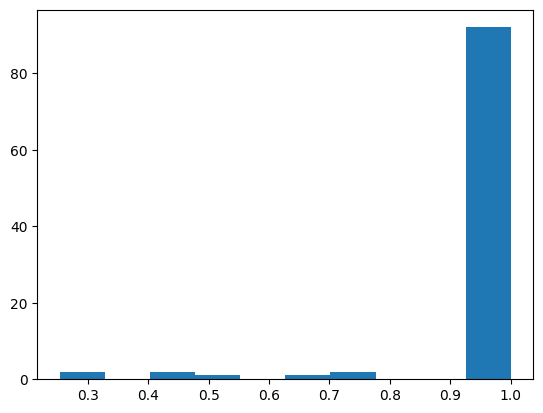

In [9]:
plt.hist(Err_dR_dC)
plt.show()     

In [ ]:
print(Err_dR_dC)

In [13]:
d_E=np.fmax(AnglestoreRIfmeasapprxconstsortedmaxdiff_min,AnglestoreRIfmeasapprxconstsortedmaxdiff_max)
d_E

array([2.82842712, 2.82842712, 2.82842712, 2.82842712, 2.82842712,
       2.82842712, 2.82842712, 2.82842712, 2.82842712, 2.82842712,
       2.82842712, 2.82842712, 2.82842712, 2.82842712, 2.82842712,
       2.82842712, 2.82842712, 2.82842712, 2.82842712, 2.82842712,
       2.82842712, 2.82842712, 2.82842712, 2.82842712, 2.82842712,
       2.82842712, 2.82842712, 2.82842712, 2.82842712, 2.82842712,
       2.82842712, 2.82842712, 2.82842712, 2.82842712, 2.82842712,
       2.82842712, 2.82842712, 2.82842712, 2.82842712, 2.82842712,
       2.82842712, 2.82842712, 2.82842712, 2.82842712, 2.82842712,
       2.82842712, 2.82842712, 2.82842712, 2.82842712, 2.82842712,
       2.82842712, 2.82842712, 2.82842712, 2.82842712, 2.82842712,
       2.82842712, 2.82842712, 2.82842712, 2.82842712, 2.82842712,
       2.82842712, 2.82842712, 2.82842712, 2.82842712, 2.82842712,
       2.82842712, 2.82842712, 2.82842712, 2.82842712, 2.82842712,
       2.82842712, 2.82842712, 2.82842712, 2.82842712, 2.82842

In [18]:
d_C


array([3.70305566e-16, 2.48253415e-16, 2.22910279e-16, 2.25487362e-16,
       6.93889390e-18, 1.92296269e-16, 9.81307787e-18, 1.75541673e-16,
       1.11022302e-16, 2.71947991e-16, 1.16523844e-16, 1.81210114e-16,
       3.59753377e-16, 1.19381245e-16, 1.11022302e-16, 2.26339869e-16,
       3.59920634e-16, 2.93737402e-16, 3.85092983e-16, 3.35371896e-16,
       2.28878340e-16, 3.16462252e-16, 1.35973996e-16, 1.75541673e-16,
       2.75466223e-16, 4.26389243e-16, 2.81003786e-16, 3.33066907e-16,
       3.28408400e-16, 8.77708367e-17, 7.06541606e-16, 3.64010962e-16,
       3.72380123e-16, 2.51337427e-16, 4.72660421e-16, 2.35513869e-16,
       1.74102007e-16, 3.36849175e-16, 3.69263917e-16, 3.20092913e-16,
       2.27401009e-16, 2.11380166e-16, 3.65199464e-16, 1.94289029e-16,
       1.59443643e-16, 1.24126708e-16, 4.74693378e-16, 6.74180589e-16,
       2.88444403e-16, 2.48253415e-16, 3.09073010e-16, 2.93737402e-16,
       1.11347088e-16, 1.79876688e-16, 1.66533454e-16, 1.14439170e-16,
      